In [ ]:
import tensorflow as tf
print(tf.__version__)


2.14.0


In [ ]:
##import some basic libararies##
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head

<bound method NDFrame.head of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfPro

In [ ]:
# convert the data set into independent and dependent features#
x=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
#feature engineering converting geography and gender into one hot endoded#
geography=pd.get_dummies(x['Geography'],drop_first=True)
gender=pd.get_dummies(x['Gender'],drop_first=True)

In [ ]:
#concatenate the VARIABLES WITH DATAFRAME##
x=x.drop(['Geography','Gender'],axis=1)
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [ ]:
x=pd.concat([x,geography,gender],axis=1)

In [ ]:
#splitting the dataset into traning set and test set#
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
##feature scaling ( required only for distancebased algorithms,ex.-Kmeans Knn)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
x_train


array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
x_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [ ]:
x_train.shape

(8000, 11)

In [ ]:
#part 2 To create the ANN##
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU     # Activations
from tensorflow.keras.layers import Dropout     # used in cutting off the neuron if deactivated, basically reduce the overfittinng and work in an efficient way #

# lets intialize ANN
classifier=Sequential()

# adding the input layer
classifier.add(Dense(units=11, activation='relu'))

#adding the first hidden layer
classifier.add(Dense(units=7, activation='relu'))

#adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))

## Adding the output layer
classifier.add(Dense(1,activation='sigmoid'))  #output layer and is have the binary classification therefore the acivations function is sigmoid #



In [ ]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)  #additionaly if to update the adam ##  # to specify the learning rate, replace the adam to opt in the  code

In [ ]:
classifier.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])   # Adam (Adaptive Moment Estimation) works with momentums of first and second order#

In [ ]:
# Early stopping ## Stop training when a monitored metric has stopped improving
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [ ]:
model=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 5s 6ms/step - loss: 0.4132 - accuracy: 0.8291 - val_loss: 0.3809 - val_accuracy: 0.8406
Epoch 2/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3642 - accuracy: 0.8464 - val_loss: 0.3721 - val_accuracy: 0.8421
Epoch 3/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3549 - accuracy: 0.8518 - val_loss: 0.3726 - val_accuracy: 0.8398
Epoch 4/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3464 - accuracy: 0.8584 - val_loss: 0.3663 - val_accuracy: 0.8512
Epoch 5/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3493 - accuracy: 0.8612 - val_loss: 0.3726 - val_accuracy: 0.8444
Epoch 6/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3444 - accuracy: 0.8589 - val_loss: 0.3620 - val_accuracy: 0.8516
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3435 - accuracy: 0.8558 - val_loss: 0.3581 - val_accuracy:

In [ ]:
model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

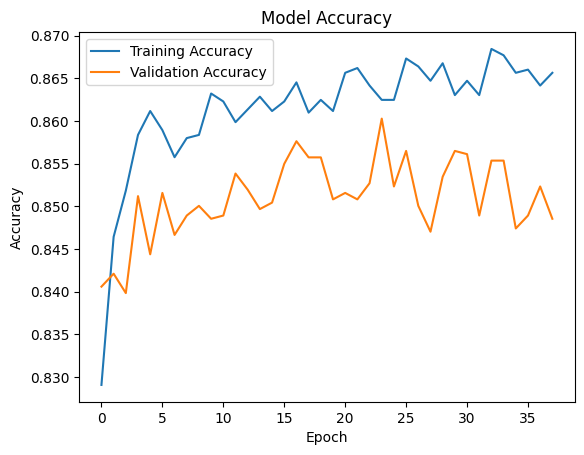

In [ ]:
plt.plot(model.history['accuracy'], label='Training Accuracy')
plt.plot(model.history['val_accuracy'], label='Validation Accuracy')

# Set labels and title
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

# Add a legend
plt.legend()

# Show the plot
plt.show()

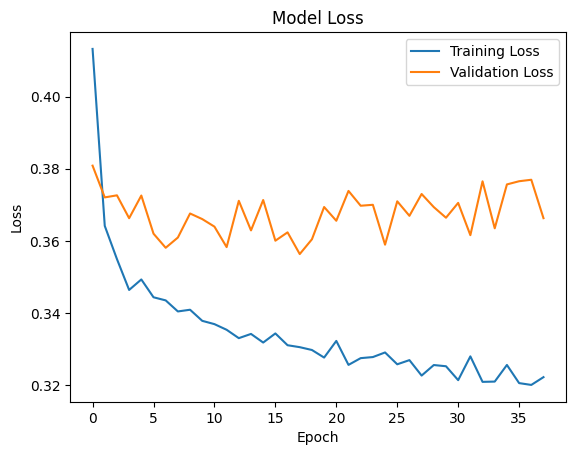

In [ ]:
plt.plot(model.history['loss'], label='Training Loss')
plt.plot(model.history['val_loss'], label='Validation Loss')

# Set labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')

# Add a legend
plt.legend(loc='upper right')

# Show the plot
plt.show()

In [ ]:
#predicting the test set result
y_predict= classifier.predict(x_test)
y_predict=(y_predict>0.5)
y_predict

63/63 [==============================] - 0s 3ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

Exception ignored in: <function _xla_gc_callback at 0x787937e9c8b0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 101, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


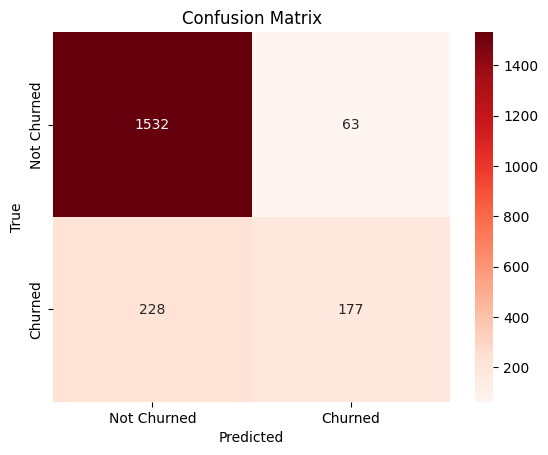

In [ ]:
#make the confusion metrics
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])

# Add labels, title, and show the plot
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#claculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_predict)
score


0.8545

In [ ]:
#to get the weights of neurons
classifier.get_weights()

[array([[-0.03507437,  0.15822439,  1.6293018 ,  0.4005167 ,  0.02086582,
         -0.2446322 , -1.1446326 , -0.43303996,  0.3836166 ,  0.813793  ,
         -0.4299879 ],
        [ 2.5954933 , -0.02267884, -0.5621866 , -2.2546158 , -0.29930657,
          2.261365  , -1.025342  ,  3.4249065 , -3.0499768 , -1.9460791 ,
         -0.1638222 ],
        [-0.02943753,  0.84513146, -1.0048509 ,  0.11912114,  0.63322186,
         -0.5773115 , -0.6681025 , -0.3547565 , -0.36118835, -0.36986998,
         -0.3732377 ],
        [-0.30085567,  0.03493485, -0.8604393 , -0.7343761 , -3.3601468 ,
         -1.046893  ,  0.2135766 , -0.5414414 ,  0.9611691 , -1.0701708 ,
         -1.5185915 ],
        [ 4.0241985 , -2.0122623 , -0.5737639 , -0.21166845,  0.03499424,
         -0.683783  ,  0.30919054, -2.2714977 , -0.3567699 ,  0.58694834,
         -3.377621  ],
        [-0.34349713,  0.26656744, -1.1230686 , -0.03952691, -0.46801525,
         -0.14513566, -1.2256418 , -0.42634636, -1.3777837 ,  1.7649152

In [ ]:
classifier.save('ANN_churn_modelling.h5')